This is how much space the figure will take up on letter paper


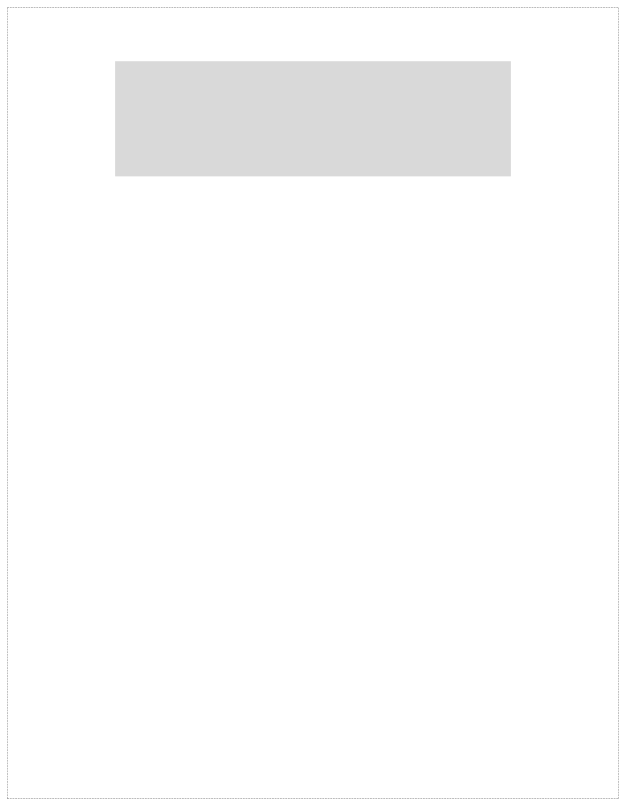

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'components'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

Square asymetric noise

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2
from symfac.experimental import RBFExpansionMiniBatch

In [3]:
n = 10
bs = 10
num_iters = 5000
errors = []
torch.manual_seed(0)
target = torch.normal(0.0, 1.0, (n, n))

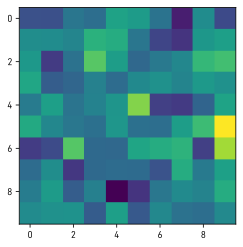

In [4]:
plt.imshow(target)

In [6]:
k=4

In [7]:
    u0=1/1000*torch.randn([bs, target.shape[0], k], device="cpu") 
    v0=1/1000*torch.randn([bs, target.shape[1], k], device="cpu") 
    a=torch.randn([bs, k], device="cpu")
    b=torch.randn([bs], device="cpu")

  0%|          | 0/5000 [00:00<?, ?it/s]

4


100%|██████████| 5000/5000 [00:03<00:00, 1453.22it/s]


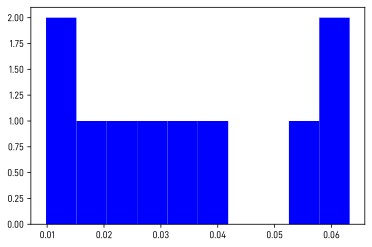

tensor(0.0098)


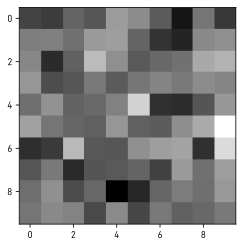

[tensor(0.0098)]


In [8]:
import time
torch.manual_seed(time.time())
num_iters = 5000
for k in [4]:
    print(k)

    
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=num_iters, device="cpu")
    

    fac.fit(
        target,
        u0=u0,
        v0=v0,
        a0=a,
        b0=b,
)
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
    plt.imshow( fac.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray")
    plt.show()
    #fac.to_pickle('data/noise_large_{0}.pickle'.format(k))
print(errors)



In [4]:
errors.append(torch.min(error))
plt.imshow( fac_mini.optimum(runs=torch.argmin( fac_mini.report.loss_best)))
plt.show()
fac_mini.to_pickle('data/noise_large_{0}.pickle'.format(k))

NameError: name 'error' is not defined

In [115]:
s_vals = []
U0, S0, V0 = np.linalg.svd(fac.optimum(runs=best_run, components=0).numpy())
print(U0)

[[-1.10129723e-02 -3.74605879e-02 -1.47171587e-01  2.21665159e-01
  -3.97034407e-01  6.37923300e-01 -5.73981047e-01  1.82974145e-01
  -1.02257030e-02 -7.72655802e-03]
 [-3.16170245e-01 -2.66593188e-01  1.00955563e-02 -2.44627833e-01
   1.42472535e-01 -3.50259393e-02 -3.12326670e-01 -3.15107614e-01
  -4.18187857e-01  6.13002956e-01]
 [-3.40610147e-01  5.70810199e-01 -3.17867994e-01 -7.80783370e-02
   5.33755600e-01  3.96079361e-01  9.54276174e-02  1.19741801e-02
   5.43160771e-04  3.66480759e-04]
 [-3.08209658e-01 -2.72859842e-01 -1.75272245e-02 -2.37037584e-01
   1.78259224e-01 -7.65875131e-02 -3.67485255e-01 -2.75783688e-01
   6.61969066e-01 -2.95149475e-01]
 [-3.62811416e-01 -2.19804853e-01  1.60889298e-01 -2.36510739e-01
  -1.08353451e-01  1.94502950e-01  1.75026387e-01 -6.99013174e-02
  -5.02459168e-01 -6.32987738e-01]
 [-3.84038866e-01 -1.92377239e-01  2.22399577e-01 -2.03989878e-01
  -2.32161731e-01  2.75499105e-01  4.58852321e-01  3.72827142e-01
   3.39736670e-01  3.60092133e-01

In [15]:
print(s_vals[1-1])
print(s_vals[2-1])
print(s_vals[4-1])
print(s_vals[8-1])
print(s_vals[16-1])
print(s_vals[32-1])
print(s_vals[64-1])
print(s_vals[128-1])
print(s_vals[256-1])
print(s_vals[512-1])



0.9957418
0.9919397
0.9844044
0.969684
0.9411498
0.8870293
0.7891392
0.6233142
0.3763922
0.1064658


NameError: name 'errs' is not defined

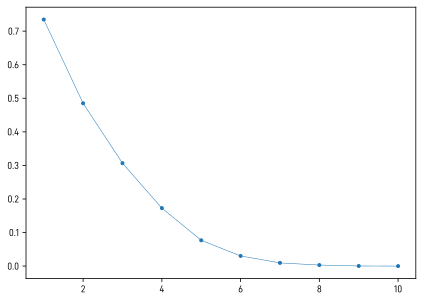

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [14]:
open('gn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

906

In [15]:
errs, s_vals = pickle.load(open("gn_losses.pickle", "rb"))

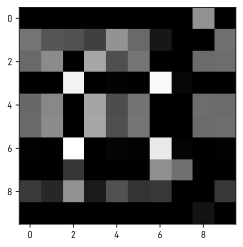

In [46]:
plt.imshow(fac.optimum.a[best_run, 1]*fac.optimum(runs=best_run, components=1), cmap="gray")

In [36]:
best_run = torch.argmin( fac.report.loss_best)

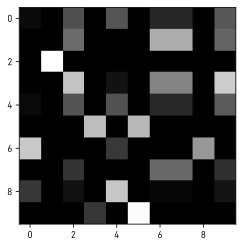

In [45]:
plt.imshow(fac.optimum.a[best_run, 0]*fac.optimum(runs=best_run, components=0), cmap="gray")

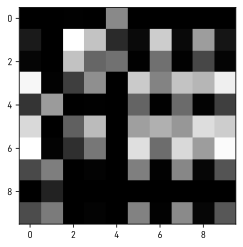

In [44]:
plt.imshow(fac.optimum.a[best_run, 3]*fac.optimum(runs=best_run, components=3), cmap="gray")

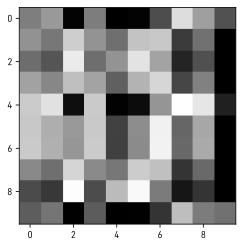

In [47]:
plt.imshow(fac.optimum.a[best_run, 2]*fac.optimum(runs=best_run, components=2), cmap="gray")

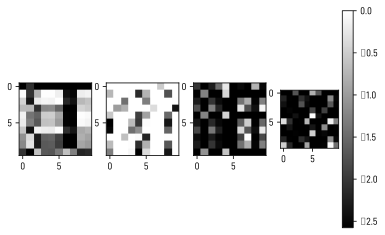

In [94]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
im1 = ax1.imshow(A1, cmap="gray")
im2 = ax2.imshow(A2, cmap="gray")
im3 = ax3.imshow(A3, cmap="gray")
im4 = ax4.imshow(A4, cmap="gray")

fig.colorbar(im2)

In [90]:
fac.optimum.a[best_run, 1]*A2

tensor([[9.8119e-42, 2.3065e-06, 2.9211e-15, -0.0000e+00, 3.9163e-36, 9.7339e-25,
         5.2215e-05, 1.3829e+00, 1.2022e-37, 8.0629e-09],
        [1.9149e+00, 5.7808e-10, 4.0333e-03, 7.0911e-02, 5.6563e+00, 2.0057e+00,
         7.8300e-12, 1.0032e-23, 4.5961e+00, 2.4169e-07],
        [4.9556e-04, 1.9116e-03, 3.8129e+00, 3.6038e-07, 2.0920e-02, 3.4446e+00,
         1.3765e-04, 8.3088e-13, 8.1303e-03, 5.7479e-02],
        [1.3994e-10, 2.6069e+00, 2.0909e+00, 2.3554e-15, 7.5541e-08, 4.4678e-03,
         9.3065e-01, 1.8580e-05, 1.4482e-08, 6.2932e+00],
        [1.5071e+00, 1.5132e-09, 6.9272e-03, 4.5557e-02, 5.1070e+00, 2.4867e+00,
         2.2343e-11, 4.4308e-23, 3.9947e+00, 5.5224e-07],
        [6.7980e+00, 1.7105e-14, 7.2072e-06, 1.8146e+00, 5.2756e+00, 8.5460e-02,
         1.0005e-16, 1.8277e-30, 6.2102e+00, 2.6846e-11],
        [6.5946e+00, 1.6643e-16, 3.5215e-07, 3.8296e+00, 3.0244e+00, 1.4546e-02,
         6.9959e-19, 2.3995e-33, 4.1193e+00, 4.3962e-13],
        [5.4827e-03, 1.474

In [84]:
A1 = fac.optimum(runs=best_run, components=0)
A2 = fac.optimum(runs=best_run, components=1)
A3 = fac.optimum(runs=best_run, components=2)
A4 = fac.optimum(runs=best_run, components=3)

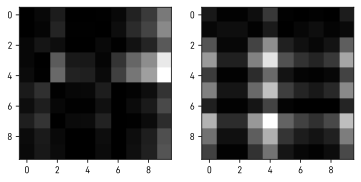

In [123]:
fig, (ax1, ax2) = plt.subplots(1,2)
im1 = ax1.imshow(fac.optimum(runs=best_run, components=0), cmap="gray")
im2 = ax2.imshow(fac.optimum(runs=best_run, components=1), cmap="gray")



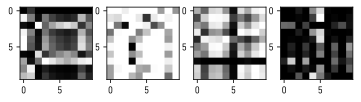

In [108]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
im1 = ax1.imshow(fac.optimum(runs=best_run, components=0), cmap="gray")
im2 = ax2.imshow(fac.optimum(runs=best_run, components=1), cmap="gray")
im3 = ax3.imshow(fac.optimum(runs=best_run, components=2), cmap="gray")
im4 = ax4.imshow(fac.optimum(runs=best_run, components=3), cmap="gray")


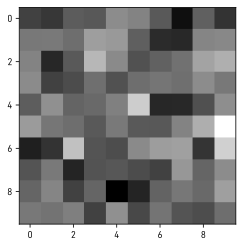

In [110]:
plt.imshow(fac.optimum(runs=best_run, components=0) + fac.optimum(runs=best_run, components=1) + fac.optimum(runs=best_run, components=2) + fac.optimum(runs=best_run, components=3) + fac.optimum.b[best_run], cmap="gray")

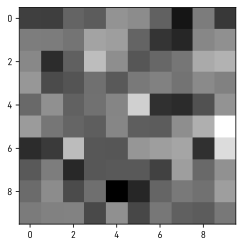

In [88]:
plt.imshow(target, cmap="gray")

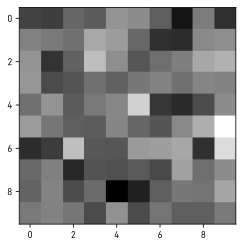

In [71]:
plt.imshow(fac.optimum(runs=best_run, components=0) + fac.optimum(runs=best_run, components=1) + fac.optimum(runs=best_run, components=2) + fac.optimum(runs=best_run, components=3), cmap='gray')

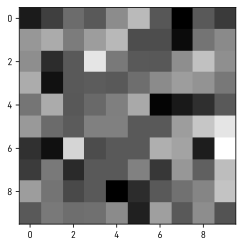

In [99]:
plt.imshow( fac.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray")